In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

## Načitanie dát

In [ ]:
dataset = pd.read_csv('../DP/Data/final_2000_balanced.csv')

## Dataset


In [ ]:
dataset.shape

(1825, 2)

In [ ]:
dataset.head()

,author_id,processed_text
0,132,man refresht drink describes geography landing...
1,132,led next day trees taking meat wool curdled mi...
2,132,enemies assert racial snobbery others hold cer...
3,132,may escaped professional observation two class...
4,132,nine o'clock gusty winter night stood lower st...


In [ ]:
print((dataset['processed_text']).isnull().sum())

0


In [ ]:
print((dataset['author_id']).isnull().sum())

0


In [ ]:
dataset['word_count'] = dataset['processed_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['processed_text'].apply(lambda x: len(x.replace(" ", "")))

average_word_count = dataset['word_count'].mean()
average_char_count = dataset['char_count'].mean()

print(f"Priemerný počet slov: {average_word_count}")
print(f"Priemerný počet znakov (bez medzier): {average_char_count}")

Priemerný počet slov: 6411.26191780822
Priemerný počet znakov (bez medzier): 38051.11452054795


In [ ]:
all_words_set = set()

for text in dataset['processed_text']:
    all_words_set.update(text.split())

total_unique_words = len(all_words_set)

print(f"Celkový počet unikátnych slov v datasete: {total_unique_words}")

Celkový počet unikátnych slov v datasete: 187025


In [ ]:
x = 5000
long_texts = dataset['processed_text'].apply(lambda text: len(text.split()) > x)

num_long_texts = long_texts.sum()

print(f"Počet vstupov s viac ako {x} slovami je: {num_long_texts}")

Počet vstupov s viac ako 5000 slovami je: 1126


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
2136     49
359      49
25267    49
492      48
6260     48
181      48
1301     48
505      47
1744     47
8137     46
945      45
1256     45
1433     45
1186     44
38191    43
4161     43
1316     42
595      42
859      41
120      41
204      41
3593     41
73       41
132      40
455      40
275      39
1842     39
717      39
1317     39
963      38
136      38
1060     38
2034     38
523      38
80       37
1753     37
467      37
1075     37
850      37
8949     37
3050     36
60       36
102      36
3579     36
Name: count, dtype: int64


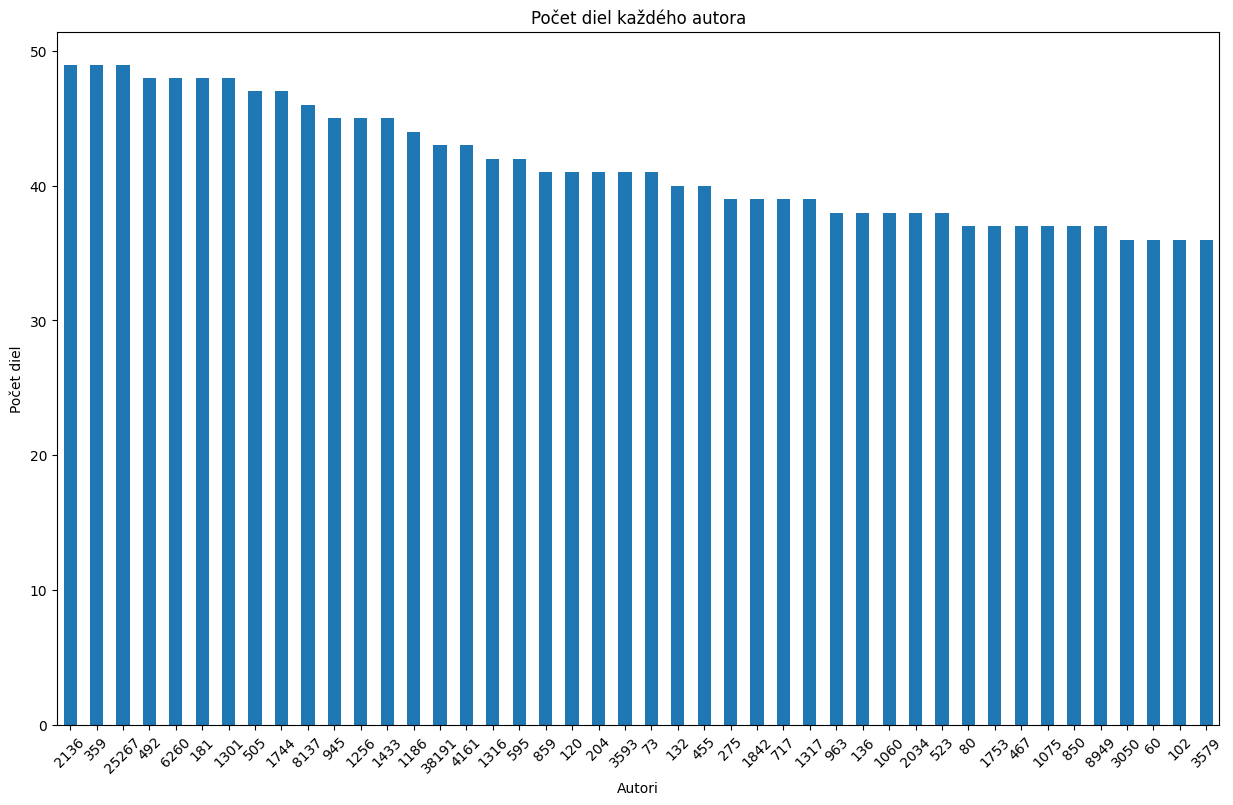

In [ ]:
plt.figure(figsize=(15, 9))
author_counts.plot(kind='bar')
plt.title('Počet diel každého autora')
plt.xlabel('Autori')
plt.ylabel('Počet diel')
plt.xticks(rotation=45)
plt.show()